In [ ]:
#Ensembling all 5 models and using hard voting

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inceptionv3
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_vgg19
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet


In [2]:
# Load the models
model1 = load_model("EfficinetB0_Brain1.keras")  # EfficientNetB0
model2 = load_model("MobileNetV2_Brain.keras")   # MobileNetV2
model3 = load_model("InceptionV3_brain.keras")   # InceptionV3
model4 = load_model("VGG19_Brain.keras")         # VGG19
model5 = load_model("DenseNet121_Brain.keras")   # DenseNet121


In [3]:
# Directory path for test data
data_dir = "D:\\Brain\\Brain Tumor\\test"


In [4]:
# Define separate data generators for each model
datagen1 = ImageDataGenerator(preprocessing_function=preprocess_efficientnet)
datagen2 = ImageDataGenerator(preprocessing_function=preprocess_mobilenetv2)
datagen3 = ImageDataGenerator(preprocessing_function=preprocess_inceptionv3)
datagen4 = ImageDataGenerator(preprocessing_function=preprocess_vgg19)
datagen5 = ImageDataGenerator(preprocessing_function=preprocess_densenet)


In [5]:
# Create generators
test_gen1 = datagen1.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen2 = datagen2.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen3 = datagen3.flow_from_directory(data_dir, target_size=(299, 299), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen4 = datagen4.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen5 = datagen5.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)


Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.


In [6]:
# Predict the labels on the test dataset with each model
predictions1 = model1.predict(test_gen1, steps=len(test_gen1))
predictions2 = model2.predict(test_gen2, steps=len(test_gen2))
predictions3 = model3.predict(test_gen3, steps=len(test_gen3))
predictions4 = model4.predict(test_gen4, steps=len(test_gen4))
predictions5 = model5.predict(test_gen5, steps=len(test_gen5))



33/33 [==============================] - 33s 923ms/step


In [7]:
# Convert probabilities to class labels
predicted_classes1 = np.argmax(predictions1, axis=1)
predicted_classes2 = np.argmax(predictions2, axis=1)
predicted_classes3 = np.argmax(predictions3, axis=1)
predicted_classes4 = np.argmax(predictions4, axis=1)
predicted_classes5 = np.argmax(predictions5, axis=1)



In [8]:
# Ensemble predictions using hard voting
final_predictions = np.array([
    np.bincount([predicted_classes1[i], predicted_classes2[i], predicted_classes3[i], predicted_classes4[i], predicted_classes5[i]], minlength=len(test_gen1.class_indices)).argmax() 
    for i in range(len(predicted_classes1))
])

# Get the true labels from one of the generators (assumed they all are the same)
true_classes = test_gen1.classes


In [9]:
# Compute the confusion matrix
cm = confusion_matrix(true_classes, final_predictions)

# Define the class labels
class_labels = list(test_gen1.class_indices.keys())



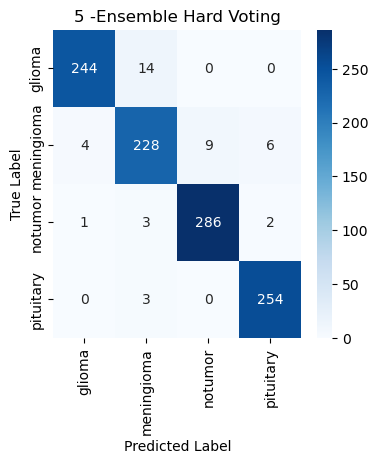

In [10]:
# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('5 -Ensemble Hard Voting')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, class_labels)


In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming your existing code above this point

# Calculate the accuracy
accuracy = accuracy_score(true_classes, final_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
report = classification_report(true_classes, final_predictions, target_names=class_labels)
print("Classification Report:\n", report)



Accuracy: 96.02%
Classification Report:
               precision    recall  f1-score   support

      glioma       0.98      0.95      0.96       258
  meningioma       0.92      0.92      0.92       247
     notumor       0.97      0.98      0.97       292
   pituitary       0.97      0.99      0.98       257

    accuracy                           0.96      1054
   macro avg       0.96      0.96      0.96      1054
weighted avg       0.96      0.96      0.96      1054



In [ ]:
#Ensembling 5 models with addings weights according to performance

Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
Found 1054 images belonging to 4 classes.
33/33 [==============================] - 11s 295ms/step


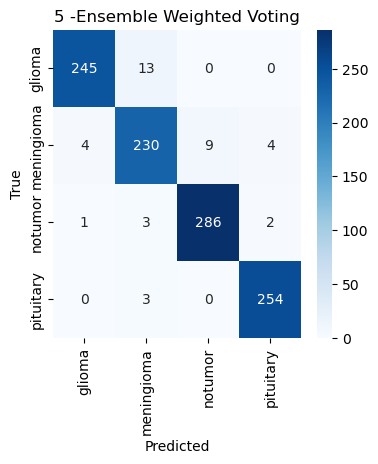

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing imports based on model architecture
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_efficientnet
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_vgg19
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inceptionv3
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

# Load models
model1 = load_model("EfficinetB0_Brain1.keras")  # EfficientNetB0
model2 = load_model("VGG19_Brain.keras")           # VGG19
model3 = load_model("DenseNet121_Brain.keras")     # DenseNet121
model4 = load_model("InceptionV3_Brain.keras")     # InceptionV3
model5 = load_model("MobileNetV2_Brain.keras")     # MobileNetV2

# Directory path for test data
data_dir = "D:\\Brain\\Brain Tumor\\test"

# Define data generators for each model with specific preprocessing
datagen1 = ImageDataGenerator(preprocessing_function=preprocess_efficientnet)
datagen2 = ImageDataGenerator(preprocessing_function=preprocess_vgg19)
datagen3 = ImageDataGenerator(preprocessing_function=preprocess_densenet)
datagen4 = ImageDataGenerator(preprocessing_function=preprocess_inceptionv3)
datagen5 = ImageDataGenerator(preprocessing_function=preprocess_mobilenetv2)

# Create generators
test_gen1 = datagen1.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen2 = datagen2.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen3 = datagen3.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)
test_gen4 = datagen4.flow_from_directory(data_dir, target_size=(299, 299), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)  # InceptionV3 uses 299x299
test_gen5 = datagen5.flow_from_directory(data_dir, target_size=(224, 224), class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

# Predict the labels on the test dataset with each model
predictions1 = model1.predict(test_gen1, steps=len(test_gen1))
predictions2 = model2.predict(test_gen2, steps=len(test_gen2))
predictions3 = model3.predict(test_gen3, steps=len(test_gen3))
predictions4 = model4.predict(test_gen4, steps=len(test_gen4))
predictions5 = model5.predict(test_gen5, steps=len(test_gen5))

# Define weights based on previous performance or misclassification rates
weights = np.array([0.30, 0.2, 0.2, 0.1, 0.2])  # Adjust based on your specific evaluation

# Calculate weighted sum of probabilities for soft voting
weighted_predictions = (predictions1 * weights[0] +
                        predictions2 * weights[1] +
                        predictions3 * weights[2] +
                        predictions4 * weights[3] +
                        predictions5 * weights[4])

# Convert weighted probabilities to final predicted classes
final_predicted_classes = np.argmax(weighted_predictions, axis=1)

# Get the true labels from one of the generators (assumed they all are the same)
true_classes = test_gen1.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, final_predicted_classes)

# Define the class labels
class_labels = list(test_gen1.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('5 -Ensemble Weighted Voting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [5]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming your existing code above this point

# Calculate the accuracy
accuracy = accuracy_score(true_classes, final_predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
report = classification_report(true_classes, final_predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)



Accuracy: 96.30%
Classification Report:
               precision    recall  f1-score   support

      glioma       0.98      0.95      0.96       258
  meningioma       0.92      0.93      0.93       247
     notumor       0.97      0.98      0.97       292
   pituitary       0.98      0.99      0.98       257

    accuracy                           0.96      1054
   macro avg       0.96      0.96      0.96      1054
weighted avg       0.96      0.96      0.96      1054

